<a href="https://colab.research.google.com/github/bchiramani/TraitementImages/blob/main/TP1TraitementImages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import numpy as np
import array
from random import *
import pandas as pd
import matplotlib.pyplot as plt


In [42]:
def read_pgm(pgm):
  (width,height)=pgm.split('\n')[2].split()
  image=[]
  for i in range(4,int(height)+4):
    data=pgm.split('\n')[i].split()
    image.append(data)
  return np.array(image)

In [43]:
def write_pgm(width,height,filename):
  data=""
  for i in range(0,height):
    for j in range(0,width):
      data+=str(randint(0,255))+" "
    data +="\n"
  fout=open(filename, "w")
  pgm_header='P2'+'\n'+str(width)+' '+str(height)+' '+str(255)+'\n'
  fout.write(pgm_header)
  fout.write(data)
  fout.close()


In [44]:
with open("/content/chat.pgm", 'r') as f :
  fichier = f.read()
image = read_pgm(fichier)
image


array([['1', '1', '1', ..., '2', '4', '3'],
       ['1', '1', '1', ..., '1', '1', '1'],
       ['1', '1', '1', ..., '1', '1', '1'],
       ...,
       ['16', '13', '12', ..., '37', '52', '53'],
       ['11', '10', '11', ..., '33', '36', '47'],
       ['11', '9', '10', ..., '25', '27', '49']], dtype='<U3')

In [45]:
def calculate_mean_std(image):
  sum =0
  height=image.shape[0]
  width=image.shape[1]
  for h in range(height):
    for w in range(width):
      sum+=int(image[h][w])
  mean=sum/(height*width)
  sum=0
  for h in range(height):
    for w in range(width):
      sum += (int(image[h][w]) - mean)**2
  std = (sum/(height*width))**(1/2)
  return mean,std


In [46]:
def histogramme_niveaux_de_gris(image):
  height = image.shape[0]
  width = image.shape[1]
  tab = np.zeros((256))
  for h in range(height):
    for w in range(width):
      tab[int(image[h][w])] +=1
  index = range(0,256)
  plt.figure(figsize=(9, 3))
  plt.subplot(131)
  plt.bar(x=index,height=tab) ;
  return tab

In [47]:
def histogramme_cumule(image):
  tab = histogramme_niveaux_de_gris(image)
  for i in range(1,256):
    tab[i] += tab[i-1]
  index = range(0,256)
  plt.figure(figsize=(9, 3))
  plt.subplot(132)
  plt.bar(x=index,height=tab) ;
  return tab

In [48]:
def programme(path):
  with open(path, 'r') as f :
    fichier = f.read()
  image = read_pgm(fichier)
  mean , std = calculate_mean_std(image)
  print("La moyenne des niveaux de gris est {} et son écrat type est {}\n".format(mean,std))
  tab1=histogramme_niveaux_de_gris(image)
  tab2=histogramme_cumule(image)

La moyenne des niveaux de gris est 85.43944010416666 et son écrat type est 71.04911303252288



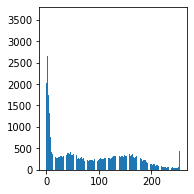

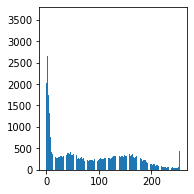

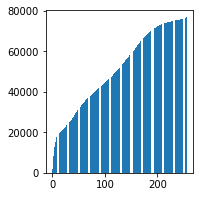

In [49]:
programme("/content/chat.pgm")